Definiamo una classe di angoli espressi in gradi e primi, dotata di operazione di somma, opposto additivo e conversione in radianti.

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [1]:
from math import modf, pi, sin, cos
class angle():
    def __init__(self, gradi, primi):
        self.gradi = gradi
        self.primi = primi
    def rad(self):
        a = self.gradi
        b = self.primi/60
        return (a+b)*pi/180
    def sin(self):
        a = self.gradi
        b = self.primi/60
        c = (a+b)*pi/180
        return sin(c)
    def cos(self):
        a = self.gradi
        b = self.primi/60
        c = (a+b)*pi/180
        return cos(c)
    def somma(self, other):
        a1 = self.gradi
        a2 = other.gradi
        b1 = self.primi/60
        b2 = other.primi/60
        c1 = a1+b1
        c2 = a2+b2
        d = c1 + c2
        return angle(modf(d)[1], modf(d)[0]*60)
    def diff(self, other):
        a1 = self.gradi
        a2 = other.gradi
        b1 = self.primi/60
        b2 = other.primi/60
        c1 = a1+b1
        c2 = a2+b2
        d = c1 - c2
        return angle(modf(d)[1], modf(d)[0]*60)
    def opposto(self):
        return angle(-self.gradi, -self.primi)
    def __str__(self):
        return '{:.0f}'.format(self.gradi)+'° '+'{:.0f}'.format(self.primi)+"'"

In [14]:
td_g,td_p=72,8
t0_g,t0_p=115,2
ts_g,t0_s=157,56
Td=angle(td_g,td_p)
T0=angle(t0_g,t0_p)
Ts=angle(ts_g,t0_s)
td=angle.diff(T0,Td)
ts=angle.diff(Ts,T0)
print('ts:',ts,'td:',td)
print('(td-ts):',angle.diff(td,ts))
sd=angle.rad(angle.diff(td,ts))/2


ts: 42° 54' td: 42° 54'
(td-ts): -0° -0'


In [15]:
import pandas as pd
def table(x,y,ex=None,ey=None,bx=True,by=True):
    if bx==True and by==True:
        dic={'x':x,'ex':ex,'y':y,'ey':ey}
    elif bx==False:
        dic={'x':x,'y':y,'ey':ey}
    elif by==False:
        dic={'x':x,'ex':ex,'y':y}
    else:
        dic={'x':x,'y':y}
    tab=pd.DataFrame(dic)
    return (tab)

In [16]:
def lin_fit_sigma_fit(data):
    x = data[:, 0]
    y = data[:, 1]
    N = len(x)
    x2 = x**2
    xy = x*y
    X = sum(x)
    X2 = sum(x2)
    XY = sum(xy)
    Y = sum(y)
    A = np.array([[X2, X],[X, N]])
    B = np.array([[XY],[Y]])
    sol = np.linalg.solve(A, B)
    a = sol[0, 0]
    b = sol[1, 0]
    Delta = N*X2-X**2
    y_fit = a*x+b
    sigma_fit = np.sqrt(sum((y_fit-y)**2)/(N-1))
    sigmaa = sigma_fit * np.sqrt(N/Delta)
    sigmab = sigma_fit * np.sqrt(X2/Delta)
    covab = -X/Delta * sigma_fit**2
    rho = covab/(sigmaa*sigmab)
    res = np.array([a, sigmaa, b, sigmab, rho])
    return res

def plot(x,y,xe,ye,fit=False,cs=5):
    fig, ax = plt.subplots(figsize=(10,10), dpi=100)
    ax.errorbar(x,y,xerr=xe,yerr=ye,linestyle='',capsize=cs,fmt='.',label='data')
    if fit==True:
        a,sigmaa,b,sigmab,rho=lin_fit_sigma_fit(np.vstack([x,y]).T)
        def lin(x,a,b):
            return a*x+b
        m,M=x.min(),x.max()
        ax.plot([m,M],[lin(m,a,b),lin(M,a,b)],zorder=100,color='orange',label=r'fit $a\cdot x+b$:'+'\n'+r'a={:.4f}+/-{:.4f}'.format(a,sigmaa)+'\n'+'b={:.4f}+/-{:.4f}'.format(b,sigmab)+'\n'+'corr.:{:.1f}'.format(rho))    
    ax.legend()
    plt.show()
    print((table(x,y,xe,ye).sort_values(by=['x'])))

In [17]:
def to_data_fit(data, deg0, pri0):
    from math import pi
    ms = data[:,0]
    theta0 = angle(deg0, pri0)
    degs = data[:, 1]
    pris = data[:, 2]
    Thetas = [angle(deg, pri) for deg, pri in zip(degs, pris)]
    thetas = [angle.diff(Theta, theta0) for Theta in Thetas]
    y = [ theta.sin() for theta in thetas ]
    y_err = [ angle.cos(theta)*(2/60)*(pi/180) for theta in thetas ]
    res_T = np.array([ms, y, y_err])
    return (np.transpose(res_T), [str(theta) for theta in thetas])

## Calcolo p ##

Fit results: a = 0.34083 +\- 0.00059  b = 0.00082 +\- 0.00083  correlation = -0.0
p = (17290 +/- 30) Angstrom
angoli relativi:  ["-42° -54'", "-19° -55'", "0° 0'", "20° 10'", "42° 54'"]
--> m ; seni ; err_seni: 
 [[-2.00000000e+00 -6.80720869e-01  4.26176183e-04]
 [-1.00000000e+00 -3.40653055e-01  5.46979832e-04]
 [ 0.00000000e+00  0.00000000e+00  5.81776417e-04]
 [ 1.00000000e+00  3.44752147e-01  5.46109887e-04]
 [ 2.00000000e+00  6.80720869e-01  4.26176183e-04]]


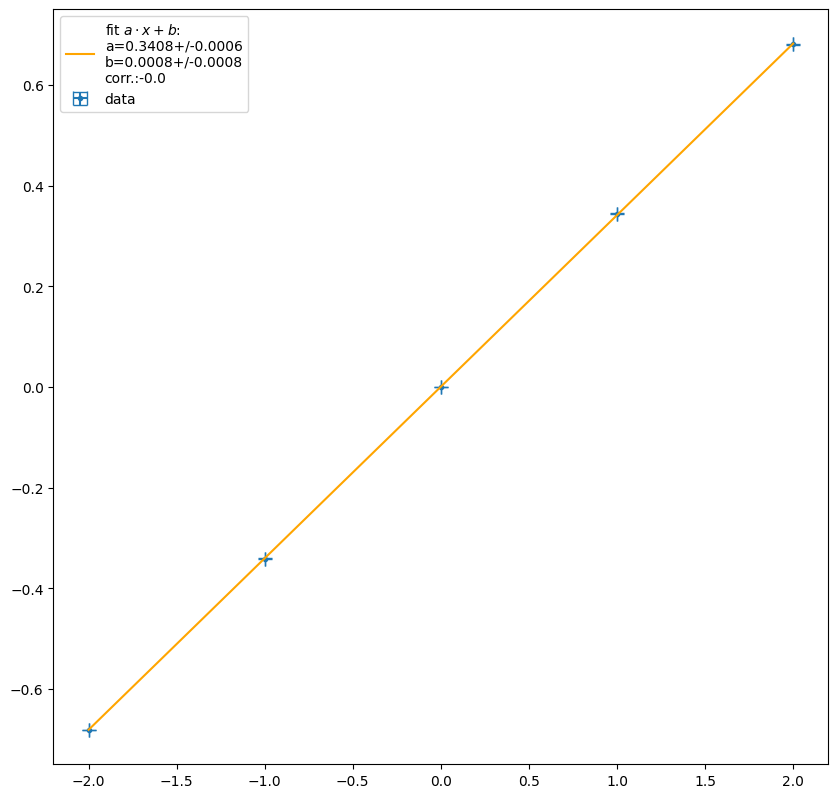

     x   ex         y        ey
0 -2.0  0.0 -0.680721  0.000426
1 -1.0  0.0 -0.340653  0.000547
2  0.0  0.0  0.000000  0.000582
3  1.0  0.0  0.344752  0.000546
4  2.0  0.0  0.680721  0.000426


In [19]:
p_file='p_fit.txt'
deg0, pri0 = 115,2
data_row = np.loadtxt(p_file, dtype=float, comments='#')
data_p,T = to_data_fit(data_row, deg0, pri0)
lambda_Na = 5893
a, sigmaa, b, sigmab, rho = lin_fit_sigma_fit(data_p)
print('Fit results: '+'a = {:.5f} +\- {:.5f}'.format(a, sigmaa)+'  '+r'b = {:.5f} +\- {:.5f}'.format(b, sigmab)+'  '+r'correlation = {}'.format(rho))
p = lambda_Na/a
sigmap = lambda_Na * sigmaa / a**2
print('p = ({:.0f}'.format(p),r'+/-'+' {:.0f})'.format(sigmap),'Angstrom')
print('angoli relativi: ',T)
print('--> m ; seni ; err_seni: \n',data_p)
plot(data_p[:,0], data_p[:,1], np.zeros(len(data_p[:,0])), data_p[:,2],fit=True)

In [ ]:
fname = 'indaco.txt'
theta0 = (260, 7)
data_row = np.loadtxt(fname, comments='#')
data, THETA = to_data_fit(data_row, *theta0) 
a, sigmaa, b, sigmab, rho = lin_fit_sigma_fit(data)
fig = plt.figure(figsize=(12,10), dpi=75)
plt.scatter(data[:,0], data[:, 1], s=3, color='red', label='data')
plt.plot(data[:, 0], a*data[:,0]+b, lw=0.5, color='green', label=r'fit : $a\cdot m + b $')
fit_info = [r'a={:.4f}+/-{:.4f}'.format(a, sigmaa), r'b={:.4f}+/-{:.4f}'.format(b, sigmab), r'corr.={:.4f}'.format(rho)]
info = '\n'.join(fit_info)
plt.legend(title=info, title_fontsize=15, fontsize=15)
plt.title(fname[:-4], fontsize=20)
plt.xlabel('m', fontsize=15)
plt.ylabel(r'$\sin(\theta)$', fontsize=15)
plt.show()
lambda_Cd = p * a
sigma_Cd = np.sqrt(sigmap**2+sigmaa**2)
print('lambda '+fname[:-4]+': ({:.0f} +/- {:.0f}) Angstrom'.format(lambda_Cd, sigma_Cd))

tabular = [r'm   $sin(\theta)$   err_sin   $\theta$']
for i in range(np.shape(data)[0]):
    tabular.append('{:.0f}   {:.4f}   {:.4f} ({})  '.format(*data[i, :], THETA[i]))
TAB = '\n'.join(tabular)
print(TAB)

In [ ]:
fname = 'azzurro.txt'
theta0 = (260, 7)
data_row = np.loadtxt(fname, comments='#')
data, THETA = to_data_fit(data_row, *theta0) 
a, sigmaa, b, sigmab, rho = lin_fit_sigma_fit(data)
fig = plt.figure(figsize=(12,10), dpi=75)
plt.scatter(data[:,0], data[:, 1], s=3, color='red', label='data')
plt.plot(data[:, 0], a*data[:,0]+b, lw=0.5, color='green', label=r'fit : $a\cdot m + b $')
fit_info = [r'a={:.4f}+/-{:.4f}'.format(a, sigmaa), r'b={:.4f}+/-{:.4f}'.format(b, sigmab), r'corr.={:.4f}'.format(rho)]
info = '\n'.join(fit_info)
plt.legend(title=info, title_fontsize=15, fontsize=15)
plt.title(fname[:-4], fontsize=20)
plt.xlabel('m', fontsize=15)
plt.ylabel(r'$\sin(\theta)$', fontsize=15)
plt.show()
lambda_Cd = p * a
sigma_Cd = np.sqrt(sigmap**2+sigmaa**2)
print('lambda '+fname[:-4]+': ({:.0f} +/- {:.0f}) Angstrom'.format(lambda_Cd, sigma_Cd))

tabular = [r'm   $sin(\theta)$   err_sin   $\theta$']
for i in range(np.shape(data)[0]):
    tabular.append('{:.0f}   {:.4f}   {:.4f} ({})  '.format(*data[i, :], THETA[i]))
TAB = '\n'.join(tabular)
print(TAB)

In [ ]:
fname = 'verde.txt'
theta0 = (260, 7)
data_row = np.loadtxt(fname, comments='#')
data, THETA = to_data_fit(data_row, *theta0) 
a, sigmaa, b, sigmab, rho = lin_fit_sigma_fit(data)
fig = plt.figure(figsize=(12,10), dpi=75)
plt.scatter(data[:,0], data[:, 1], s=3, color='red', label='data')
plt.plot(data[:, 0], a*data[:,0]+b, lw=0.5, color='green', label=r'fit : $a\cdot m + b $')
fit_info = [r'a={:.4f}+/-{:.4f}'.format(a, sigmaa), r'b={:.4f}+/-{:.4f}'.format(b, sigmab), r'corr.={:.4f}'.format(rho)]
info = '\n'.join(fit_info)
plt.legend(title=info, title_fontsize=15, fontsize=15)
plt.title(fname[:-4], fontsize=20)
plt.xlabel('m', fontsize=15)
plt.ylabel(r'$\sin(\theta)$', fontsize=15)
plt.show()
lambda_Cd = p * a
sigma_Cd = np.sqrt(sigmap**2+sigmaa**2)
print('lambda '+fname[:-4]+': ({:.0f} +/- {:.0f}) Angstrom'.format(lambda_Cd, sigma_Cd))

tabular = [r'm   $sin(\theta)$   err_sin   $\theta$']
for i in range(np.shape(data)[0]):
    tabular.append('{:.0f}   {:.4f}   {:.4f} ({})  '.format(*data[i, :], THETA[i]))
TAB = '\n'.join(tabular)
print(TAB)

In [ ]:
fname = 'rosso.txt'
theta0 = (260, 7)
data_row = np.loadtxt(fname, comments='#')
data, THETA = to_data_fit(data_row, *theta0) 
a, sigmaa, b, sigmab, rho = lin_fit_sigma_fit(data)
fig = plt.figure(figsize=(12,10), dpi=75)
plt.scatter(data[:,0], data[:, 1], s=3, color='red', label='data')
plt.plot(data[:, 0], a*data[:,0]+b, lw=0.5, color='green', label=r'fit : $a\cdot m + b $')
fit_info = [r'a={:.4f}+/-{:.4f}'.format(a, sigmaa), r'b={:.4f}+/-{:.4f}'.format(b, sigmab), r'corr.={:.4f}'.format(rho)]
info = '\n'.join(fit_info)
plt.legend(title=info, title_fontsize=15, fontsize=15)
plt.title(fname[:-4], fontsize=20)
plt.xlabel('m', fontsize=15)
plt.ylabel(r'$\sin(\theta)$', fontsize=15)
plt.show()
lambda_Cd = p * a
sigma_Cd = np.sqrt(sigmap**2+sigmaa**2)
print('lambda '+fname[:-4]+': ({:.0f} +/- {:.0f}) Angstrom'.format(lambda_Cd, sigma_Cd))

tabular = [r'm   $sin(\theta)$   err_sin   $\theta$']
for i in range(np.shape(data)[0]):
    tabular.append('{:.0f}   {:.4f}   {:.4f} ({})  '.format(*data[i, :], THETA[i]))
TAB = '\n'.join(tabular)
print(TAB)